In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as np

In [2]:
# Setting visualization style
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
def fetch_data():
    """
    Fetch historical Bitcoin data from the CoinGecko API.
    Returns a DataFrame with Date, Price, Volume, and Market Cap.
    """
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30"
    response = requests.get(url)
    data = response.json()

    # Extracting prices and volumes
    prices = data['prices']
    volumes = data['total_volumes']

    # Creating DataFrame
    df = pd.DataFrame(prices, columns=['Date', 'Price'])
    df['Date'] = pd.to_datetime(df['Date'], unit='ms')
    
    # Adding volume data
    volume_df = pd.DataFrame(volumes, columns=['Date', 'Volume'])
    volume_df['Date'] = pd.to_datetime(volume_df['Date'], unit='ms')
    
    # Merging price and volume data
    df = pd.merge(df, volume_df, on='Date')
    return df

In [4]:
def basic_eda(df):
    print("Data snapshot:")
    print(df.head())
    print("\nData info:")
    print(df.info())
    print("\nSummary statistics:")
    print(df.describe())

In [5]:
def plot_price_trends(df):
    plt.figure()
    sns.lineplot(data=df, x='Date', y='Price', color='blue', label='Closing Price (USD)')
    plt.title('Bitcoin Closing Price Over Time (Last 30 Days)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
def plot_volume(df):
    plt.figure()
    sns.lineplot(data=df, x='Date', y='Volume', color='orange')
    plt.title('Bitcoin Trading Volume Over Time (Last 30 Days)')
    plt.xlabel('Date')
    plt.ylabel('Volume (USD)')
    plt.tight_layout()
    plt.show()

In [7]:
def calculate_and_plot_volatility(df):
    # Calculate daily returns
    df['Returns'] = df['Price'].pct_change()
    # Calculate rolling volatility (7-day rolling std dev of returns)
    df['Volatility'] = df['Returns'].rolling(window=7).std() * np.sqrt(7)  # Annualized approx

    plt.figure()
    sns.lineplot(data=df, x='Date', y='Volatility', color='red')
    plt.title('Bitcoin 7-Day Rolling Volatility (Annualized)')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.tight_layout()
    plt.show()

Fetching data from CoinGecko...
Performing basic exploratory data analysis...
Data snapshot:
                     Date         Price        Volume
0 2025-04-12 05:04:49.346  83199.966509  3.674386e+10
1 2025-04-12 06:03:58.541  83303.792754  3.617327e+10
2 2025-04-12 07:04:51.887  83549.910745  3.579078e+10
3 2025-04-12 08:04:44.290  83704.628161  3.554795e+10
4 2025-04-12 09:09:09.084  83666.131270  3.393601e+10

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    720 non-null    datetime64[ns]
 1   Price   720 non-null    float64       
 2   Volume  720 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 17.0 KB
None

Summary statistics:
                                Date          Price        Volume
count                            720     720.000000  7.200000e+02
mean   2025-04-27 04:41:36.09

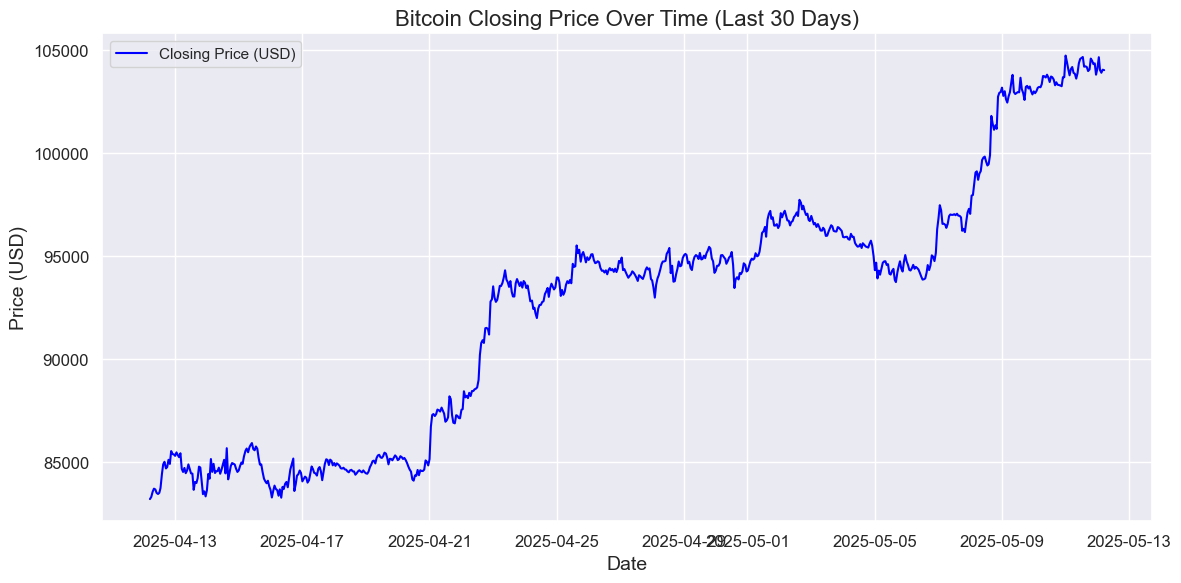

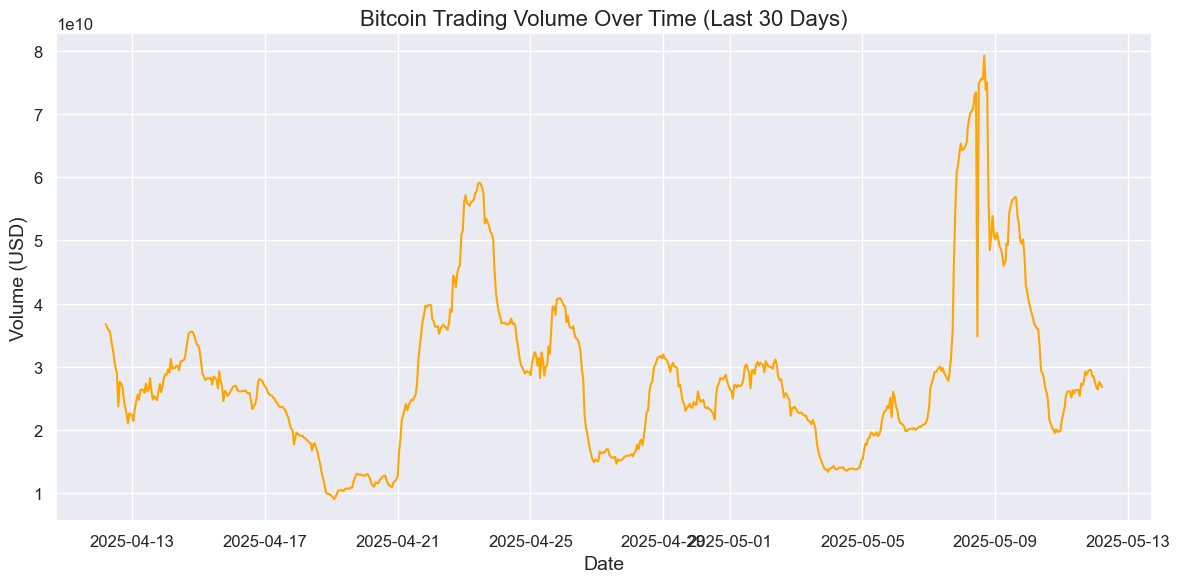

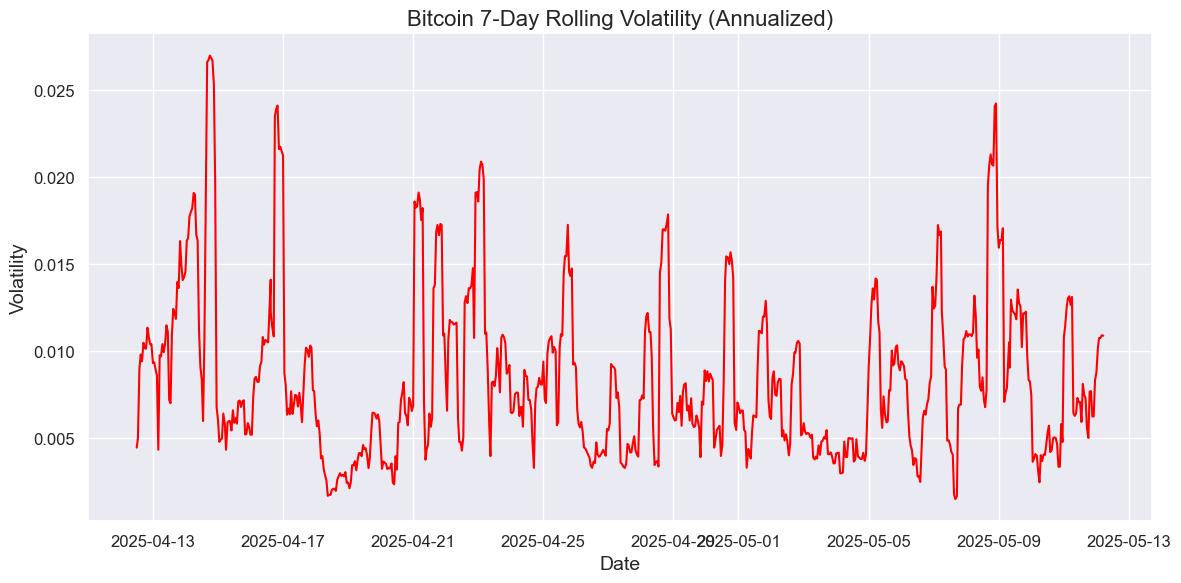

In [8]:
def main():
    print("Fetching data from CoinGecko...")
    df = fetch_data()
    
    print("Performing basic exploratory data analysis...")
    basic_eda(df)
    
    # Plot closing price trends
    plot_price_trends(df)
    
    # Plot trading volume
    plot_volume(df)
    
    # Calculate and plot volatility
    calculate_and_plot_volatility(df)

if __name__ == "__main__":
    main()